# Applied Data Science Capstone Project: Ultimate Tourist Helper


Thilina Thialakarathna

## Part 1 : Getting Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_html("https://en.wikipedia.org/wiki/Districts_of_Sri_Lanka")[4] 

In [3]:
df.head()

,District,Area map,Province,Districtcapital,Landareain km2 (mi2)[24],Inlandwaterareain km2 (mi2)[24],Totalareain km2 (mi2)[24],Population(2012)[25],Populationdensityper km2(per mi2)[a]
0,Ampara,NaN,Eastern,Ampara,"4,222 (1,630)",193 (75),"4,415 (1,705)",649402,154 (400)
1,Anuradhapura,NaN,North Central,Anuradhapura,"6,664 (2,573)",515 (199),"7,179 (2,772)",860575,129 (330)
2,Badulla,NaN,Uva,Badulla,"2,827 (1,092)",34 (13),"2,861 (1,105)",815405,288 (750)
3,Batticaloa,NaN,Eastern,Batticaloa,"2,610 (1,010)",244 (94),"2,854 (1,102)",526567,202 (520)
4,Colombo,NaN,Western,Colombo,676 (261),23 (8.9),699 (270),2324349,"3,438 (8,900)"


In [4]:
df["District"]= df["District"].apply(lambda x: "SriLanka-"+ x)

In [5]:
df.head()

,District,Area map,Province,Districtcapital,Landareain km2 (mi2)[24],Inlandwaterareain km2 (mi2)[24],Totalareain km2 (mi2)[24],Population(2012)[25],Populationdensityper km2(per mi2)[a]
0,SriLanka-Ampara,NaN,Eastern,Ampara,"4,222 (1,630)",193 (75),"4,415 (1,705)",649402,154 (400)
1,SriLanka-Anuradhapura,NaN,North Central,Anuradhapura,"6,664 (2,573)",515 (199),"7,179 (2,772)",860575,129 (330)
2,SriLanka-Badulla,NaN,Uva,Badulla,"2,827 (1,092)",34 (13),"2,861 (1,105)",815405,288 (750)
3,SriLanka-Batticaloa,NaN,Eastern,Batticaloa,"2,610 (1,010)",244 (94),"2,854 (1,102)",526567,202 (520)
4,SriLanka-Colombo,NaN,Western,Colombo,676 (261),23 (8.9),699 (270),2324349,"3,438 (8,900)"


In [6]:
# this package convert addresses to geographical coordinates
from geopy.geocoders import Nominatim

In [7]:
geolocator = Nominatim(user_agent="SriLanka_food")

df['Dist_coord']= df['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Dist_coord'].apply(pd.Series)

df.drop(['Dist_coord'], axis=1, inplace=True)
df.head(10)

,District,Area map,Province,Districtcapital,Landareain km2 (mi2)[24],Inlandwaterareain km2 (mi2)[24],Totalareain km2 (mi2)[24],Population(2012)[25],Populationdensityper km2(per mi2)[a],Latitude,Longitude
0,SriLanka-Ampara,NaN,Eastern,Ampara,"4,222 (1,630)",193 (75),"4,415 (1,705)",649402,154 (400),7.297812,81.679019
1,SriLanka-Anuradhapura,NaN,North Central,Anuradhapura,"6,664 (2,573)",515 (199),"7,179 (2,772)",860575,129 (330),8.334985,80.410610
2,SriLanka-Badulla,NaN,Uva,Badulla,"2,827 (1,092)",34 (13),"2,861 (1,105)",815405,288 (750),6.989820,81.056943
3,SriLanka-Batticaloa,NaN,Eastern,Batticaloa,"2,610 (1,010)",244 (94),"2,854 (1,102)",526567,202 (520),7.735603,81.694196
4,SriLanka-Colombo,NaN,Western,Colombo,676 (261),23 (8.9),699 (270),2324349,"3,438 (8,900)",6.934997,79.853846
5,SriLanka-Galle,NaN,Southern,Galle,"1,617 (624)",35 (14),"1,652 (638)",1063334,"658 (1,700)",6.032814,80.214955
6,SriLanka-Gampaha,NaN,Western,Gampaha,"1,341 (518)",46 (18),"1,387 (536)",2304833,"1,719 (4,450)",7.092560,79.995140
7,SriLanka-Hambantota,NaN,Southern,Hambantota,"2,496 (964)",113 (44),"2,609 (1,007)",599903,240 (620),6.124913,81.124256
8,SriLanka-Jaffna,NaN,Northern,Jaffna,929 (359),96 (37),"1,025 (396)",583882,"629 (1,630)",9.665093,80.009303
9,SriLanka-Kalutara,NaN,Western,Kalutara,"1,576 (608)",22 (8.5),"1,598 (617)",1221948,"775 (2,010)",6.583522,79.961251


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # packege to handle JSON files
import requests

from pandas.io.json import json_normalize # to tranform JSON files into a pd df

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [9]:
geolocator = Nominatim(user_agent="SriLanka_food")
location = geolocator.geocode('SriLanka')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates {}, {}.'.format(latitude, longitude))

The geograpical coordinates 7.5554942, 80.7137847.


In [79]:
!pip install folium

In [10]:
import folium

In [11]:
map_srilanka = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_srilanka) 
    
map_srilanka

## PART 2 - Getting Locational Data with Foursquare API

In [12]:
CLIENT_ID = 'EQYCKOI3FQOBOO0VVB1YQK51ZWGR1NC4EQYU2BY21ROYPYTM' # Put Your Client Id
CLIENT_SECRET = 'FWBDFCZH24G3UXWAZZDC1QZUEQDFNS0JSJKHV3FEHW2Y1JIN' # Put You Client Secret 
VERSION = '20201108'
print('Your credentails:')
print('CLIENT_ID: {}'.format(CLIENT_ID))
print('CLIENT_SECRET: {}'.format(CLIENT_SECRET))

Your credentails:
CLIENT_ID: EQYCKOI3FQOBOO0VVB1YQK51ZWGR1NC4EQYU2BY21ROYPYTM
CLIENT_SECRET: FWBDFCZH24G3UXWAZZDC1QZUEQDFNS0JSJKHV3FEHW2Y1JIN


In [13]:
# function that extracts categories of the venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=1000):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the request URL for API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [15]:
srilanka_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [16]:
srilanka_venues.shape

(567, 7)

In [17]:
srilanka_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,SriLanka-Ampara,7.297812,81.679019,New City Food Cabin & Bakery,7.291221,81.672919,Asian Restaurant
1,SriLanka-Ampara,7.297812,81.679019,Cargills Food City,7.291302,81.675272,Grocery Store
2,SriLanka-Ampara,7.297812,81.679019,Ampara Bus Stand,7.290341,81.672989,Bus Station
3,SriLanka-Ampara,7.297812,81.679019,Hotel Monty,7.286460,81.678074,Bed & Breakfast
4,SriLanka-Anuradhapura,8.334985,80.410610,Little Paradise,8.323512,80.409828,Hotel
5,SriLanka-Anuradhapura,8.334985,80.410610,Sri Maha Bodhi (ජය ශ්රි මහා බොධිය),8.344787,80.397209,Historic Site
6,SriLanka-Anuradhapura,8.334985,80.410610,Cey Bank Rest Anuradhapura,8.340691,80.407562,Motel
7,SriLanka-Anuradhapura,8.334985,80.410610,Jetavana Stupa,8.351703,80.404067,Historic Site
8,SriLanka-Anuradhapura,8.334985,80.410610,Milano Tourist Rest Guesthouse Anuradhapura,8.325040,80.417077,Hotel
9,SriLanka-Anuradhapura,8.334985,80.410610,Cargills Food City,8.331617,80.409273,Supermarket


Now I have 570 location details for 25 districts

In [18]:
SriLanka_Venues_only_restaurant = srilanka_venues[srilanka_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
SriLanka_Venues_only_restaurant.index = np.arange(1, len(SriLanka_Venues_only_restaurant )+1)

In [19]:
SriLanka_Venues_only_Hotel = srilanka_venues[srilanka_venues['Venue Category'].str.contains('Hotel')].reset_index(drop=True)
SriLanka_Venues_only_Hotel.index = np.arange(1, len(SriLanka_Venues_only_Hotel )+1)

In [20]:
print(SriLanka_Venues_only_restaurant['Venue Category'].value_counts())

Restaurant                       34
Sri Lankan Restaurant            13
Fast Food Restaurant             13
Asian Restaurant                 12
Indian Restaurant                11
Chinese Restaurant               10
Seafood Restaurant                6
Vegetarian / Vegan Restaurant     3
Thai Restaurant                   3
Italian Restaurant                2
Japanese Restaurant               2
English Restaurant                1
Halal Restaurant                  1
German Restaurant                 1
American Restaurant               1
Mediterranean Restaurant          1
French Restaurant                 1
Dumpling Restaurant               1
South Indian Restaurant           1
Name: Venue Category, dtype: int64


In [21]:

print('There are {} restaurants.'.format(len(SriLanka_Venues_only_restaurant['Venue Category'])))

There are 117 restaurants.


In [22]:
print('There are {} unique categories.'.format(len(SriLanka_Venues_only_restaurant['Venue Category'].unique())))


There are 19 unique categories.


In [23]:
# create a dataframe of top 10 categories
SriLanka_Venues_Top10 = SriLanka_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
SriLanka_Venues_Top10 = SriLanka_Venues_Top10.reset_index()
SriLanka_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
SriLanka_Venues_Top10

,Venue_Category,Frequency
0,Restaurant,34
1,Sri Lankan Restaurant,13
2,Fast Food Restaurant,13
3,Asian Restaurant,12
4,Indian Restaurant,11
5,Chinese Restaurant,10
6,Seafood Restaurant,6
7,Vegetarian / Vegan Restaurant,3
8,Thai Restaurant,3
9,Italian Restaurant,2


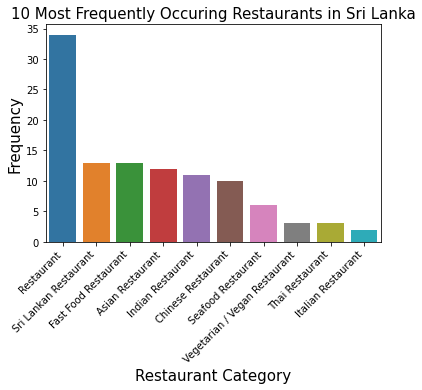

<Figure size 2160x1440 with 0 Axes>

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=SriLanka_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Restaurants in Sri Lanka', fontsize=15)
plt.xlabel("Restaurant Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Top10Venues.png", dpi=300, bbox_inches = "tight")
fig = plt.figure(figsize=(30,20))
plt.tight_layout()
plt.show()

In [25]:

print('There are {} Hotels.'.format(len(SriLanka_Venues_only_Hotel['Venue Category'])))

There are 68 Hotels.


In [26]:
print('There are {} unique categories.'.format(len(SriLanka_Venues_only_Hotel['Venue Category'].unique())))


There are 3 unique categories.


In [27]:
# create a dataframe of top 10 categories
SriLanka_hotel_Top = SriLanka_Venues_only_Hotel['Venue Category'].value_counts().to_frame(name='frequency')
SriLanka_hotel_Top = SriLanka_hotel_Top.reset_index()
SriLanka_hotel_Top.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
SriLanka_hotel_Top

,Venue_Category,Frequency
0,Hotel,65
1,Hotel Bar,2
2,Hotel Pool,1


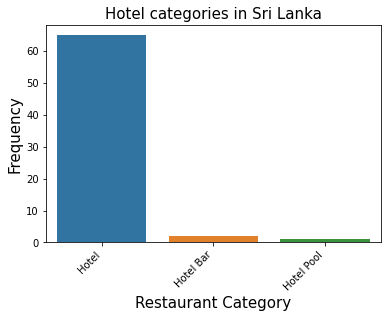

<Figure size 2160x1440 with 0 Axes>

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=SriLanka_hotel_Top)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Hotel categories in Sri Lanka', fontsize=15)
plt.xlabel("Restaurant Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Top10Venues.png", dpi=300, bbox_inches = "tight")
fig = plt.figure(figsize=(30,20))
plt.tight_layout()
plt.show()

In [29]:
print("Shape of the Data-Frame with Venue Category only Restaurant: ", SriLanka_Venues_only_restaurant.shape)
SriLanka_Venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (117, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,SriLanka-Ampara,7.297812,81.679019,New City Food Cabin & Bakery,7.291221,81.672919,Asian Restaurant
2,SriLanka-Anuradhapura,8.334985,80.410610,Seedevi Family Restaurant,8.324940,80.398261,Sri Lankan Restaurant
3,SriLanka-Anuradhapura,8.334985,80.410610,Chamie Restaurant,8.332282,80.409860,Asian Restaurant
4,SriLanka-Badulla,6.989820,81.056943,Dulsara,6.985258,81.058709,Asian Restaurant
5,SriLanka-Badulla,6.989820,81.056943,White House,6.984447,81.058591,Restaurant
6,SriLanka-Badulla,6.989820,81.056943,River side holiday inn,6.982875,81.059204,Restaurant
7,SriLanka-Badulla,6.989820,81.056943,Sambusa Food Corner,7.001008,81.053027,Fast Food Restaurant
8,SriLanka-Batticaloa,7.735603,81.694196,Sri Krishna,7.724028,81.688929,Indian Restaurant
9,SriLanka-Batticaloa,7.735603,81.694196,tomato restaurant,7.719813,81.696836,Restaurant
10,SriLanka-Colombo,6.934997,79.853846,Long Feng Chinese Restaurant,6.929313,79.849817,Chinese Restaurant


In [30]:
print("Shape of the Data-Frame with Venue Category only Restaurant: ", SriLanka_Venues_only_Hotel.shape)
SriLanka_Venues_only_Hotel.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (68, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,SriLanka-Anuradhapura,8.334985,80.410610,Little Paradise,8.323512,80.409828,Hotel
2,SriLanka-Anuradhapura,8.334985,80.410610,Milano Tourist Rest Guesthouse Anuradhapura,8.325040,80.417077,Hotel
3,SriLanka-Anuradhapura,8.334985,80.410610,The Lakeside At Nuwarawewa,8.337190,80.415659,Hotel
4,SriLanka-Anuradhapura,8.334985,80.410610,Miridiya Hotel,8.331226,80.418740,Hotel
5,SriLanka-Anuradhapura,8.334985,80.410610,The Grand Hotel guest house,8.334562,80.416289,Hotel
6,SriLanka-Anuradhapura,8.334985,80.410610,Nadeeja Hotel,8.333376,80.416825,Hotel
7,SriLanka-Anuradhapura,8.334985,80.410610,Rajarata Hotel,8.331084,80.418862,Hotel
8,SriLanka-Anuradhapura,8.334985,80.410610,Montana Rest,8.320261,80.407029,Hotel
9,SriLanka-Batticaloa,7.735603,81.694196,Hotel East Lagoon,7.728789,81.704993,Hotel
10,SriLanka-Colombo,6.934997,79.853846,Cinnamon Lakeside,6.928973,79.849547,Hotel


In [31]:
SriLanka_Venues_restaurant = SriLanka_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [32]:
SriLanka_Venues_Hotel = SriLanka_Venues_only_Hotel.groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude'])['Venue Category'].apply(lambda x: x[x.str.contains('Hotel')].count())

In [33]:
SriLanka_Venues_restaurant

Neighborhood
SriLanka-Ampara           1
SriLanka-Anuradhapura     2
SriLanka-Badulla          4
SriLanka-Batticaloa       2
SriLanka-Colombo         22
SriLanka-Galle           17
SriLanka-Jaffna           5
SriLanka-Kalutara         3
SriLanka-Kandy           16
SriLanka-Kegalle          1
SriLanka-Kilinochchi      2
SriLanka-Kurunegala       9
SriLanka-Matara           8
SriLanka-Monaragala       1
SriLanka-Mullaitivu       1
SriLanka-Nuwara Eliya     7
SriLanka-Ratnapura        1
SriLanka-Total            7
SriLanka-Trincomalee      1
SriLanka-Vavuniya         7
Name: Venue Category, dtype: int64

In [34]:
SriLanka_Venues_Hotel

Neighborhood           Neighborhood Latitude  Neighborhood Longitude
SriLanka-Anuradhapura  8.334985               80.410610                  8
SriLanka-Batticaloa    7.735603               81.694196                  1
SriLanka-Colombo       6.934997               79.853846                 12
SriLanka-Galle         6.032814               80.214955                  2
SriLanka-Jaffna        9.665093               80.009303                  6
SriLanka-Kalutara      6.583522               79.961251                  2
SriLanka-Kandy         7.293092               80.635077                 19
SriLanka-Kurunegala    7.487046               80.364908                  1
SriLanka-Mannar        8.977244               79.913779                  1
SriLanka-Matale        7.472045               80.623431                  1
SriLanka-Nuwara Eliya  6.973886               80.767127                 12
SriLanka-Polonnaruwa   7.939536               81.000339                  3
Name: Venue Category, dtype: in

In [35]:
# one hot encoding
SriLanka_onehot = pd.get_dummies(SriLanka_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SriLanka_onehot['Neighborhood'] = SriLanka_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SriLanka_onehot.columns[-1]] + list(SriLanka_onehot.columns[:-1])
SriLanka_onehot = SriLanka_onehot[fixed_columns]

SriLanka_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Chinese Restaurant,Dumpling Restaurant,English Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Sri Lankan Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
1,SriLanka-Ampara,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SriLanka-Anuradhapura,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,SriLanka-Anuradhapura,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SriLanka-Badulla,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,SriLanka-Badulla,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Prepare data for clustering

In [36]:
SriLanka_grouped = SriLanka_onehot.groupby('Neighborhood').mean().reset_index()
SriLanka_grouped.head(2)

,Neighborhood,American Restaurant,Asian Restaurant,Chinese Restaurant,Dumpling Restaurant,English Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Sri Lankan Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,SriLanka-Ampara,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SriLanka-Anuradhapura,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0


In [48]:
num_top_venues = 5

for hood in SriLanka_grouped['Neighborhood']:
    print("###### "+hood+" ######")
    temp = SriLanka_grouped[SriLanka_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

###### SriLanka-Ampara ######
                   venue  freq
0       Asian Restaurant   1.0
1    American Restaurant   0.0
2     Italian Restaurant   0.0
3        Thai Restaurant   0.0
4  Sri Lankan Restaurant   0.0


###### SriLanka-Anuradhapura ######
                   venue  freq
0  Sri Lankan Restaurant   0.5
1       Asian Restaurant   0.5
2    American Restaurant   0.0
3     Italian Restaurant   0.0
4        Thai Restaurant   0.0


###### SriLanka-Badulla ######
                  venue  freq
0            Restaurant  0.50
1  Fast Food Restaurant  0.25
2      Asian Restaurant  0.25
3   American Restaurant  0.00
4   Japanese Restaurant  0.00


###### SriLanka-Batticaloa ######
                   venue  freq
0      Indian Restaurant   0.5
1             Restaurant   0.5
2     Italian Restaurant   0.0
3        Thai Restaurant   0.0
4  Sri Lankan Restaurant   0.0


###### SriLanka-Colombo ######
                  venue  freq
0    Seafood Restaurant  0.23
1     Indian Restaurant  0.14
2 

We can see the frequency of restaurents types in each district

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SriLanka_grouped['Neighborhood']

for ind in np.arange(SriLanka_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SriLanka_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,SriLanka-Ampara,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant,Dumpling Restaurant
1,SriLanka-Anuradhapura,Sri Lankan Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant
2,SriLanka-Badulla,Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant
3,SriLanka-Batticaloa,Indian Restaurant,Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
4,SriLanka-Colombo,Seafood Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Fast Food Restaurant
5,SriLanka-Galle,Restaurant,Sri Lankan Restaurant,Indian Restaurant,Asian Restaurant,Chinese Restaurant
6,SriLanka-Jaffna,Vegetarian / Vegan Restaurant,Asian Restaurant,Indian Restaurant,Sri Lankan Restaurant,American Restaurant
7,SriLanka-Kalutara,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Asian Restaurant
8,SriLanka-Kandy,Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Sri Lankan Restaurant
9,SriLanka-Kegalle,Sri Lankan Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant


In [39]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,SriLanka-Ampara,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant,Dumpling Restaurant
1,SriLanka-Anuradhapura,Sri Lankan Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant
2,SriLanka-Badulla,Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant
3,SriLanka-Batticaloa,Indian Restaurant,Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
4,SriLanka-Colombo,Seafood Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Fast Food Restaurant
5,SriLanka-Galle,Restaurant,Sri Lankan Restaurant,Indian Restaurant,Asian Restaurant,Chinese Restaurant
6,SriLanka-Jaffna,Vegetarian / Vegan Restaurant,Asian Restaurant,Indian Restaurant,Sri Lankan Restaurant,American Restaurant
7,SriLanka-Kalutara,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Asian Restaurant
8,SriLanka-Kandy,Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Sri Lankan Restaurant
9,SriLanka-Kegalle,Sri Lankan Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant


In [40]:
# num. of clusters
kclusters = 3

SriLanka_grouped_clustering = SriLanka_grouped.drop('Neighborhood', 1)

# k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=9).fit(SriLanka_grouped_clustering)

kmeans.labels_[0:10]

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0])

In [41]:
SriLanka_merged = df
SriLanka_merged.head()

,District,Area map,Province,Districtcapital,Landareain km2 (mi2)[24],Inlandwaterareain km2 (mi2)[24],Totalareain km2 (mi2)[24],Population(2012)[25],Populationdensityper km2(per mi2)[a],Latitude,Longitude
0,SriLanka-Ampara,NaN,Eastern,Ampara,"4,222 (1,630)",193 (75),"4,415 (1,705)",649402,154 (400),7.297812,81.679019
1,SriLanka-Anuradhapura,NaN,North Central,Anuradhapura,"6,664 (2,573)",515 (199),"7,179 (2,772)",860575,129 (330),8.334985,80.410610
2,SriLanka-Badulla,NaN,Uva,Badulla,"2,827 (1,092)",34 (13),"2,861 (1,105)",815405,288 (750),6.989820,81.056943
3,SriLanka-Batticaloa,NaN,Eastern,Batticaloa,"2,610 (1,010)",244 (94),"2,854 (1,102)",526567,202 (520),7.735603,81.694196
4,SriLanka-Colombo,NaN,Western,Colombo,676 (261),23 (8.9),699 (270),2324349,"3,438 (8,900)",6.934997,79.853846


In [42]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,SriLanka-Ampara,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant,Dumpling Restaurant
1,SriLanka-Anuradhapura,Sri Lankan Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant
2,SriLanka-Badulla,Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant
3,SriLanka-Batticaloa,Indian Restaurant,Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
4,SriLanka-Colombo,Seafood Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Fast Food Restaurant


In [43]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted

neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [44]:
neighborhoods_venues_sorted_w_clusters.head(25)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,SriLanka-Ampara,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant,Dumpling Restaurant
1,0,SriLanka-Anuradhapura,Sri Lankan Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant
2,2,SriLanka-Badulla,Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant
3,2,SriLanka-Batticaloa,Indian Restaurant,Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
4,2,SriLanka-Colombo,Seafood Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Fast Food Restaurant
5,2,SriLanka-Galle,Restaurant,Sri Lankan Restaurant,Indian Restaurant,Asian Restaurant,Chinese Restaurant
6,2,SriLanka-Jaffna,Vegetarian / Vegan Restaurant,Asian Restaurant,Indian Restaurant,Sri Lankan Restaurant,American Restaurant
7,2,SriLanka-Kalutara,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Asian Restaurant
8,2,SriLanka-Kandy,Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Sri Lankan Restaurant
9,0,SriLanka-Kegalle,Sri Lankan Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant


In [45]:
SriLanka_merged.rename(columns={'District':'Neighborhood'}, inplace=True)

SriLanka_merged = SriLanka_merged.join(neighborhoods_venues_sorted_w_clusters.set_index('Neighborhood'), on='Neighborhood')

SriLanka_merged.drop([17], inplace=True)
SriLanka_merged

SriLanka_merged.head(25)

,Neighborhood,Area map,Province,Districtcapital,Landareain km2 (mi2)[24],Inlandwaterareain km2 (mi2)[24],Totalareain km2 (mi2)[24],Population(2012)[25],Populationdensityper km2(per mi2)[a],Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,SriLanka-Ampara,NaN,Eastern,Ampara,"4,222 (1,630)",193 (75),"4,415 (1,705)",649402,154 (400),7.297812,81.679019,2.0,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant,Dumpling Restaurant
1,SriLanka-Anuradhapura,NaN,North Central,Anuradhapura,"6,664 (2,573)",515 (199),"7,179 (2,772)",860575,129 (330),8.334985,80.410610,0.0,Sri Lankan Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant
2,SriLanka-Badulla,NaN,Uva,Badulla,"2,827 (1,092)",34 (13),"2,861 (1,105)",815405,288 (750),6.989820,81.056943,2.0,Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant
3,SriLanka-Batticaloa,NaN,Eastern,Batticaloa,"2,610 (1,010)",244 (94),"2,854 (1,102)",526567,202 (520),7.735603,81.694196,2.0,Indian Restaurant,Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
4,SriLanka-Colombo,NaN,Western,Colombo,676 (261),23 (8.9),699 (270),2324349,"3,438 (8,900)",6.934997,79.853846,2.0,Seafood Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Fast Food Restaurant
5,SriLanka-Galle,NaN,Southern,Galle,"1,617 (624)",35 (14),"1,652 (638)",1063334,"658 (1,700)",6.032814,80.214955,2.0,Restaurant,Sri Lankan Restaurant,Indian Restaurant,Asian Restaurant,Chinese Restaurant
6,SriLanka-Gampaha,NaN,Western,Gampaha,"1,341 (518)",46 (18),"1,387 (536)",2304833,"1,719 (4,450)",7.092560,79.995140,NaN,NaN,NaN,NaN,NaN,NaN
7,SriLanka-Hambantota,NaN,Southern,Hambantota,"2,496 (964)",113 (44),"2,609 (1,007)",599903,240 (620),6.124913,81.124256,NaN,NaN,NaN,NaN,NaN,NaN
8,SriLanka-Jaffna,NaN,Northern,Jaffna,929 (359),96 (37),"1,025 (396)",583882,"629 (1,630)",9.665093,80.009303,2.0,Vegetarian / Vegan Restaurant,Asian Restaurant,Indian Restaurant,Sri Lankan Restaurant,American Restaurant
9,SriLanka-Kalutara,NaN,Western,Kalutara,"1,576 (608)",22 (8.5),"1,598 (617)",1221948,"775 (2,010)",6.583522,79.961251,2.0,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Asian Restaurant


In [49]:

SriLanka_Venues_restaurant_df  = SriLanka_Venues_restaurant.to_frame().reset_index()
SriLanka_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
SriLanka_Venues_restaurant_df.index = np.arange(1, len(SriLanka_Venues_restaurant_df)+1)
list_rest_no =SriLanka_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =SriLanka_Venues_restaurant_df['Neighborhood'].to_list()

In [50]:
SriLanka_merged.dropna(subset=['1st Most Common Venue'], axis = 0, inplace = True)

In [51]:
SriLanka_merged

,Neighborhood,Area map,Province,Districtcapital,Landareain km2 (mi2)[24],Inlandwaterareain km2 (mi2)[24],Totalareain km2 (mi2)[24],Population(2012)[25],Populationdensityper km2(per mi2)[a],Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,SriLanka-Ampara,NaN,Eastern,Ampara,"4,222 (1,630)",193 (75),"4,415 (1,705)",649402,154 (400),7.297812,81.679019,2.0,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant,Dumpling Restaurant
1,SriLanka-Anuradhapura,NaN,North Central,Anuradhapura,"6,664 (2,573)",515 (199),"7,179 (2,772)",860575,129 (330),8.334985,80.410610,0.0,Sri Lankan Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant
2,SriLanka-Badulla,NaN,Uva,Badulla,"2,827 (1,092)",34 (13),"2,861 (1,105)",815405,288 (750),6.989820,81.056943,2.0,Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant
3,SriLanka-Batticaloa,NaN,Eastern,Batticaloa,"2,610 (1,010)",244 (94),"2,854 (1,102)",526567,202 (520),7.735603,81.694196,2.0,Indian Restaurant,Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
4,SriLanka-Colombo,NaN,Western,Colombo,676 (261),23 (8.9),699 (270),2324349,"3,438 (8,900)",6.934997,79.853846,2.0,Seafood Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Fast Food Restaurant
5,SriLanka-Galle,NaN,Southern,Galle,"1,617 (624)",35 (14),"1,652 (638)",1063334,"658 (1,700)",6.032814,80.214955,2.0,Restaurant,Sri Lankan Restaurant,Indian Restaurant,Asian Restaurant,Chinese Restaurant
8,SriLanka-Jaffna,NaN,Northern,Jaffna,929 (359),96 (37),"1,025 (396)",583882,"629 (1,630)",9.665093,80.009303,2.0,Vegetarian / Vegan Restaurant,Asian Restaurant,Indian Restaurant,Sri Lankan Restaurant,American Restaurant
9,SriLanka-Kalutara,NaN,Western,Kalutara,"1,576 (608)",22 (8.5),"1,598 (617)",1221948,"775 (2,010)",6.583522,79.961251,2.0,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Asian Restaurant
10,SriLanka-Kandy,NaN,Central,Kandy,"1,917 (740)",23 (8.9),"1,940 (750)",1375382,"716 (1,850)",7.293092,80.635077,2.0,Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Sri Lankan Restaurant
11,SriLanka-Kegalle,NaN,Sabaragamuwa,Kegalle,"1,685 (651)",8 (3.1),"1,693 (654)",840648,"499 (1,290)",7.253201,80.345413,0.0,Sri Lankan Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant


In [52]:
map_restaurants = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the three clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(SriLanka_merged['Latitude'], 
                                  SriLanka_merged['Longitude'], 
                                  SriLanka_merged['Neighborhood'], 
                                  SriLanka_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_restaurants)
       
map_restaurants

## PART 3 - Cluster Analysis

#### Cluster 1 

In [53]:
SriLanka_merged.loc[SriLanka_merged['Cluster Labels'] == 0, SriLanka_merged.columns[[1] + list(range(5, SriLanka_merged.shape[1]))]]

,Area map,Inlandwaterareain km2 (mi2)[24],Totalareain km2 (mi2)[24],Population(2012)[25],Populationdensityper km2(per mi2)[a],Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,NaN,515 (199),"7,179 (2,772)",860575,129 (330),8.334985,80.410610,0.0,Sri Lankan Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant
11,NaN,8 (3.1),"1,693 (654)",840648,"499 (1,290)",7.253201,80.345413,0.0,Sri Lankan Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
12,NaN,74 (29),"1,279 (494)",113510,94 (240),9.384007,80.408722,0.0,Vegetarian / Vegan Restaurant,Sri Lankan Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
18,NaN,202 (78),"2,617 (1,010)",92238,38 (98),9.269853,80.814535,0.0,Sri Lankan Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant


#### Cluster 2 

In [54]:
SriLanka_merged.loc[SriLanka_merged['Cluster Labels'] == 1, SriLanka_merged.columns[[1] + list(range(5, SriLanka_merged.shape[1]))]]

,Area map,Inlandwaterareain km2 (mi2)[24],Totalareain km2 (mi2)[24],Population(2012)[25],Populationdensityper km2(per mi2)[a],Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
22,NaN,39 (15),"3,275 (1,264)",1088007,336 (870),6.680369,80.402298,1.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
23,NaN,198 (76),"2,727 (1,053)",379541,150 (390),8.576425,81.234495,1.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant


#### Cluster 3

In [55]:
SriLanka_merged.loc[SriLanka_merged['Cluster Labels'] == 2, SriLanka_merged.columns[[1] + list(range(5, SriLanka_merged.shape[1]))]]

,Area map,Inlandwaterareain km2 (mi2)[24],Totalareain km2 (mi2)[24],Population(2012)[25],Populationdensityper km2(per mi2)[a],Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,NaN,193 (75),"4,415 (1,705)",649402,154 (400),7.297812,81.679019,2.0,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Chinese Restaurant,Dumpling Restaurant
2,NaN,34 (13),"2,861 (1,105)",815405,288 (750),6.989820,81.056943,2.0,Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant
3,NaN,244 (94),"2,854 (1,102)",526567,202 (520),7.735603,81.694196,2.0,Indian Restaurant,Restaurant,Halal Restaurant,Asian Restaurant,Chinese Restaurant
4,NaN,23 (8.9),699 (270),2324349,"3,438 (8,900)",6.934997,79.853846,2.0,Seafood Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Fast Food Restaurant
5,NaN,35 (14),"1,652 (638)",1063334,"658 (1,700)",6.032814,80.214955,2.0,Restaurant,Sri Lankan Restaurant,Indian Restaurant,Asian Restaurant,Chinese Restaurant
8,NaN,96 (37),"1,025 (396)",583882,"629 (1,630)",9.665093,80.009303,2.0,Vegetarian / Vegan Restaurant,Asian Restaurant,Indian Restaurant,Sri Lankan Restaurant,American Restaurant
9,NaN,22 (8.5),"1,598 (617)",1221948,"775 (2,010)",6.583522,79.961251,2.0,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Asian Restaurant
10,NaN,23 (8.9),"1,940 (750)",1375382,"716 (1,850)",7.293092,80.635077,2.0,Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Sri Lankan Restaurant
13,NaN,192 (74),"4,816 (1,859)",1618465,350 (910),7.487046,80.364908,2.0,Restaurant,Sri Lankan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
16,NaN,13 (5.0),"1,283 (495)",814048,"641 (1,660)",5.947822,80.548292,2.0,Restaurant,Fast Food Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant
